# Deep Learning Practice 1-1: Object Recognition in an Image with Caffe
- slightly modified from examples/00-classification.ipynb
- 2016 November 26, Heo, Min-Oh

# 1. setup

* use magic function for interactive mode

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# display plots in this notebook
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 10)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'  # use grayscale output rather than a (potentially misleading) color heatmap

* To run any command at the system shell, simply prefix it with !

In [2]:
!pwd

/opt/caffe


## 2. network definition in Caffe: external files

* .proto : define class and data structures with google protocol buffer (./src/caffe/proto/caffe.proto ), used in compile time
* .prototxt: used in running time
    * the net prototxt: define the architecture (and pointing to train/test data)
    * the solver prototxt: define the learning parameters with google protocol buffer 
* .caffemodel: binary file having neural network parameters

In [3]:
# !scripts/download_model_binary.py models/bvlc_reference_caffenet
!ls ./models/bvlc_reference_caffenet/

bvlc_reference_caffenet.caffemodel  readme.md	     train_val.prototxt
deploy.prototxt			    solver.prototxt


In [4]:
!cat ./models/bvlc_reference_caffenet/deploy.prototxt
# !cat ./models/bvlc_reference_caffenet/solver.prototxt
# !cat ./models/bvlc_reference_caffenet/train_val.prototxt

name: "CaffeNet"
layer {
  name: "data"
  type: "Input"
  top: "data"
  input_param { shape: { dim: 10 dim: 3 dim: 227 dim: 227 } }
}
layer {
  name: "conv1"
  type: "Convolution"
  bottom: "data"
  top: "conv1"
  convolution_param {
    num_output: 96
    kernel_size: 11
    stride: 4
  }
}
layer {
  name: "relu1"
  type: "ReLU"
  bottom: "conv1"
  top: "conv1"
}
layer {
  name: "pool1"
  type: "Pooling"
  bottom: "conv1"
  top: "pool1"
  pooling_param {
    pool: MAX
    kernel_size: 3
    stride: 2
  }
}
layer {
  name: "norm1"
  type: "LRN"
  bottom: "pool1"
  top: "norm1"
  lrn_param {
    local_size: 5
    alpha: 0.0001
    beta: 0.75
  }
}
layer {
  name: "conv2"
  type: "Convolution"
  bottom: "norm1"
  top: "conv2"
  convolution_param {
    num_output: 256
    pad: 2
    kernel_size: 5
    group: 2
  }
}
layer {
  name: "relu2"
  type: "ReLU"
  bottom: "conv2"
  top: "conv2"
}
layer {
  name: "pool2"
  type: "Pooling"
  bottom: "conv2"
  top: "pool2"
  pooling_param {
    pool

## 2.1 To draw Network Architecture with caffe.draw

* graphviz and pydotplus required to run caffe.draw

In [5]:
from google.protobuf import text_format
from caffe.draw import get_pydot_graph
from caffe.proto import caffe_pb2
from IPython.display import display, Image 

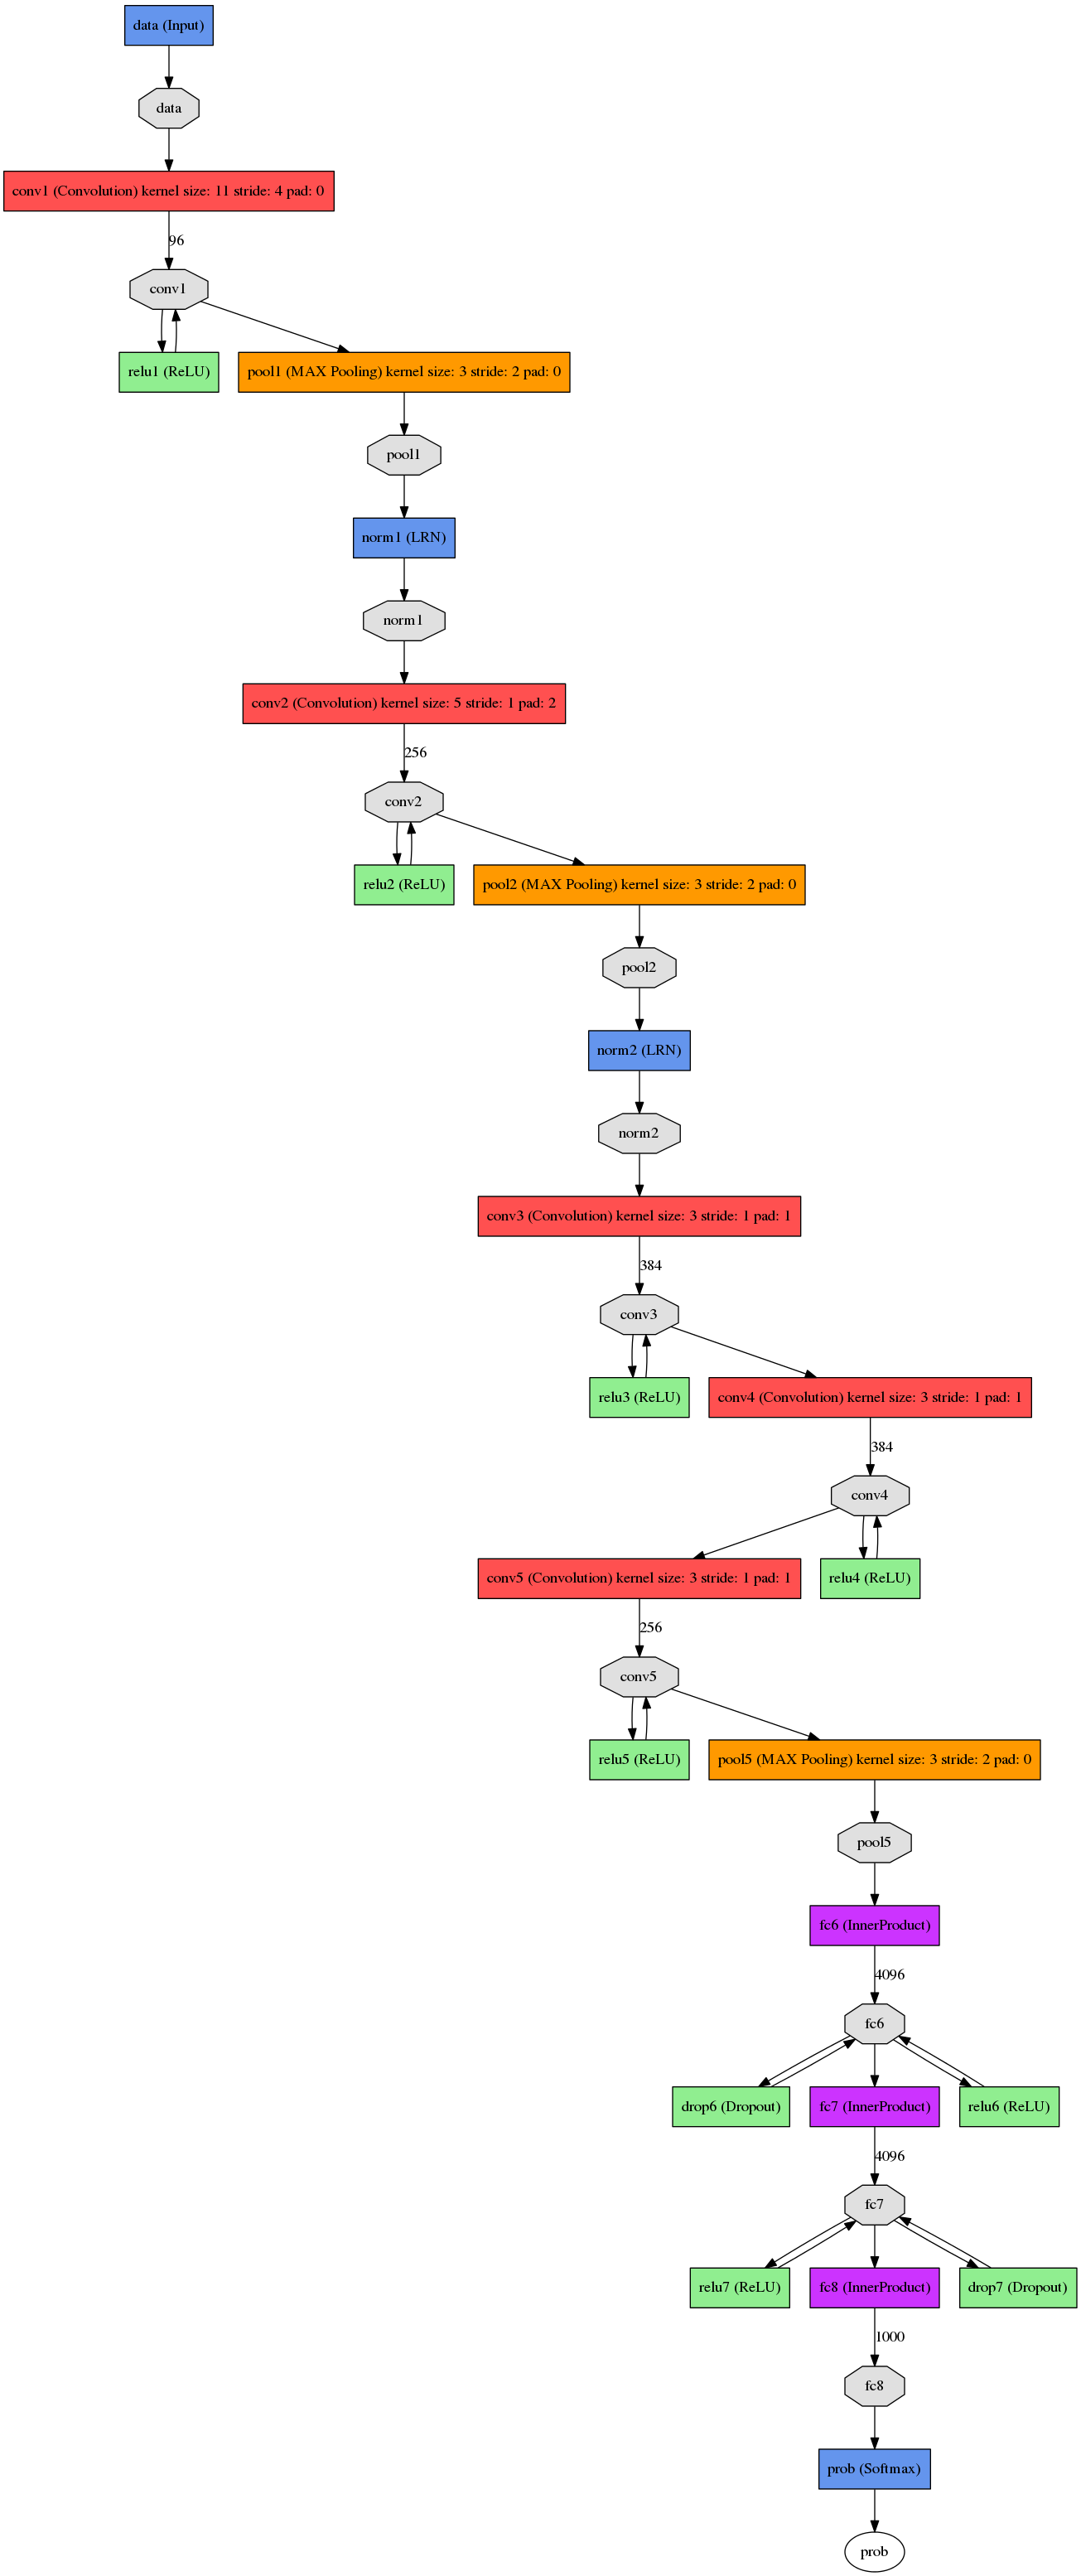

In [6]:
_net = caffe_pb2.NetParameter()
f = open("./models/bvlc_reference_caffenet/deploy.prototxt")
text_format.Merge(f.read(), _net)
display(Image(get_pydot_graph(_net,"TB").create_png()))

## 3. Classification with CLI



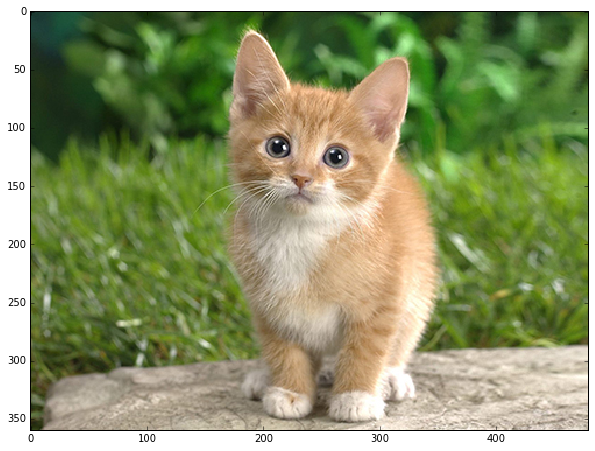

In [7]:
plt.imshow(plt.imread('./examples/images/cat.jpg'))

In [8]:
#!/opt/caffe/build/examples/cpp_classification/classification

!/opt/caffe/build/examples/cpp_classification/classification ./models/bvlc_reference_caffenet/deploy.prototxt \
    ./models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel ./data/ilsvrc12/imagenet_mean.binaryproto \
    ./data/ilsvrc12/synset_words.txt ./examples/images/cat.jpg

---------- Prediction for ./examples/images/cat.jpg ----------
0.3134 - "n02123045 tabby, tabby cat"
0.2380 - "n02123159 tiger cat"
0.1235 - "n02124075 Egyptian cat"
0.1003 - "n02119022 red fox, Vulpes vulpes"
0.0715 - "n02127052 lynx, catamount"


In [9]:
!python ./python/classify.py --mean_file '' examples/images/cat.jpg output.npy

CPU mode
W1123 08:03:24.731770  6812 _caffe.cpp:122] DEPRECATION WARNING - deprecated use of Python interface
W1123 08:03:24.731791  6812 _caffe.cpp:123] Use this instead (with the named "weights" parameter):
W1123 08:03:24.731794  6812 _caffe.cpp:125] Net('./python/../models/bvlc_reference_caffenet/deploy.prototxt', 1, weights='./python/../models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel')
I1123 08:03:24.733208  6812 net.cpp:58] Initializing net from parameters: 
name: "CaffeNet"
state {
  phase: TEST
  level: 0
}
layer {
  name: "data"
  type: "Input"
  top: "data"
  input_param {
    shape {
      dim: 10
      dim: 3
      dim: 227
      dim: 227
    }
  }
}
layer {
  name: "conv1"
  type: "Convolution"
  bottom: "data"
  top: "conv1"
  convolution_param {
    num_output: 96
    kernel_size: 11
    stride: 4
  }
}
layer {
  name: "relu1"
  type: "ReLU"
  bottom: "conv1"
  top: "conv1"
}
layer {
  name: "pool1"
  type: "Pooling"
  bottom: "conv1"
  top: "pool1"
  po

NPY file format is binary file format for persisting a single arbitrary NumPy array on disk. 
* link: http://docs.scipy.org/doc/numpy-dev/neps/npy-format.html

## 3.1 label check

In [10]:
import numpy as np
np.load('output.npy')

array([[  3.91652826e-08,   3.71935384e-05,   2.48166401e-07,
          2.32448500e-07,   1.41762641e-07,   8.28246925e-07,
          5.91784442e-07,   1.10443159e-06,   8.19996567e-05,
          2.07746848e-06,   3.35283949e-06,   5.68469932e-06,
          4.80906965e-05,   1.67094856e-06,   6.90286561e-06,
          4.21387949e-06,   6.30140585e-06,   4.59228395e-05,
          1.24982819e-07,   6.85305110e-08,   1.19047240e-06,
          1.04851733e-06,   6.31967680e-07,   1.42711784e-07,
          1.69551484e-07,   6.51765077e-08,   4.13953188e-07,
          8.90780314e-07,   5.27847774e-08,   7.34771456e-05,
          5.99998884e-07,   4.06296209e-07,   7.47622153e-07,
          2.89157072e-07,   1.71369948e-07,   6.36888231e-08,
          1.85135193e-07,   2.05327041e-07,   2.80236151e-07,
          4.50089459e-07,   1.94060863e-06,   2.88838891e-07,
          1.19957826e-06,   2.76056653e-07,   1.13990893e-06,
          4.37133458e-08,   2.60289698e-06,   2.86913121e-07,
        

In [11]:
output=np.load('output.npy')
output_prob=output[0]


In [12]:
labels_file = './data/ilsvrc12/synset_words.txt'
labels = np.loadtxt(labels_file, str, delimiter='\t')

print 'output label:', labels[output_prob.argmax()]

# sort top five predictions from softmax output
top_inds = output_prob.argsort()[::-1][:8]  # reverse sort and take five largest items
print 'probabilities and labels:'
zip(output_prob[top_inds], labels[top_inds])

output label: n02123159 tiger cat
probabilities and labels:


[(0.18598148, 'n02123159 tiger cat'),
 (0.15719818, 'n02123045 tabby, tabby cat'),
 (0.11859579, 'n02124075 Egyptian cat'),
 (0.10724328, 'n02127052 lynx, catamount'),
 (0.067653313, 'n02325366 wood rabbit, cottontail, cottontail rabbit'),
 (0.06652844, 'n02119789 kit fox, Vulpes macrotis'),
 (0.049156651, 'n02342885 hamster'),
 (0.046403576, 'n02119022 red fox, Vulpes vulpes')]

## 4. load network and input preprocessing

In [13]:
import caffe
caffe.set_mode_cpu()

In [14]:
net = caffe.Net("./models/bvlc_reference_caffenet/deploy.prototxt",
                "./models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel", caffe.TEST)

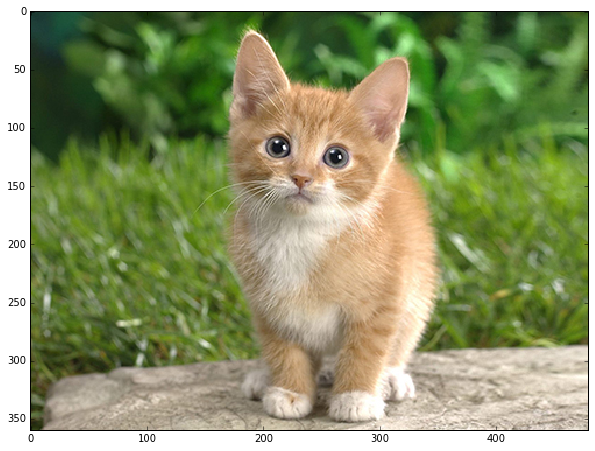

In [15]:
# input image
image = caffe.io.load_image('./examples/images/cat.jpg')

plt.imshow(image)

In [16]:
# load the mean ImageNet image (as distributed with Caffe) for subtraction
mu = np.load('./python/caffe/imagenet/ilsvrc_2012_mean.npy')
mu = mu.mean(1).mean(1)  # average over pixels to obtain the mean (BGR) pixel values
print 'mean-subtracted values:', zip('BGR', mu)


mean-subtracted values: [('B', 104.0069879317889), ('G', 116.66876761696767), ('R', 122.6789143406786)]


In [17]:
#mu = np.load('./python/caffe/imagenet/ilsvrc_2012_mean.npy')
#print mu.mean(1).mean(1)

In [19]:
net.inputs
# ['data']

net.outputs
# ['prob']

net.blobs
# ordered dict: you may retrieve with  "net.blobs['data']"

net.top_names
net.bottom_names
# ordered dict: top, bottom names of each layer

#net.blob_loss_weights

OrderedDict([('data', []), ('conv1', ['data']), ('relu1', ['conv1']), ('pool1', ['conv1']), ('norm1', ['pool1']), ('conv2', ['norm1']), ('relu2', ['conv2']), ('pool2', ['conv2']), ('norm2', ['pool2']), ('conv3', ['norm2']), ('relu3', ['conv3']), ('conv4', ['conv3']), ('relu4', ['conv4']), ('conv5', ['conv4']), ('relu5', ['conv5']), ('pool5', ['conv5']), ('fc6', ['pool5']), ('relu6', ['fc6']), ('drop6', ['fc6']), ('fc7', ['fc6']), ('relu7', ['fc7']), ('drop7', ['fc7']), ('fc8', ['fc7']), ('prob', ['fc8'])])

In [20]:
# create transformer for the input called 'data'
tfm = caffe.io.Transformer({'data':net.blobs['data'].data.shape})

tfm.set_transpose('data', (2,0,1))  # move image channels to outermost dimension
tfm.set_mean('data', mu)            # subtract the dataset-mean value in each channel
tfm.set_raw_scale('data', 255)      # rescale from [0, 1] to [0, 255]
tfm.set_channel_swap('data', (2,1,0))  # swap channels from RGB to BGR

In [21]:
np.shape(image)
net.blobs['data'].data.shape
print "original shape: {}, shape in blobs: {}".format(np.shape(image),net.blobs['data'].data.shape)

original shape: (360, 480, 3), shape in blobs: (10, 3, 227, 227)


In [23]:
tfm_image = tfm.preprocess('data', image)
print(np.shape(tfm_image))

# copy the image data into the memory allocated for the net
net.blobs['data'].data[...] = tfm_image

(3, 227, 227)


In [27]:
### perform classification
output = net.forward()

output_prob = output['prob'][0]  # the output probability vector for the first image in the batch
print 'predicted class is:', output_prob.argmax()

predicted class is: 281


In [28]:
print 'output label:', labels[output_prob.argmax()]

output label: n02123045 tabby, tabby cat


In [29]:
# sort top five predictions from softmax output
top_inds = output_prob.argsort()[::-1][:8]  # reverse sort and take five largest items

print 'probabilities and labels:'
zip(output_prob[top_inds], labels[top_inds])

probabilities and labels:


[(0.31243679, 'n02123045 tabby, tabby cat'),
 (0.23797153, 'n02123159 tiger cat'),
 (0.12387231, 'n02124075 Egyptian cat'),
 (0.10075705, 'n02119022 red fox, Vulpes vulpes'),
 (0.070957251, 'n02127052 lynx, catamount'),
 (0.053997595, 'n02119789 kit fox, Vulpes macrotis'),
 (0.014484302, 'n02123394 Persian cat'),
 (0.01132188, 'n04493381 tub, vat')]

## 5. Examining intermediate output


In [30]:
# for each layer, show the output shape
for layer_name, blob in net.blobs.iteritems():
    print layer_name + '\t' + str(blob.data.shape)

data	(10, 3, 227, 227)
conv1	(10, 96, 55, 55)
pool1	(10, 96, 27, 27)
norm1	(10, 96, 27, 27)
conv2	(10, 256, 27, 27)
pool2	(10, 256, 13, 13)
norm2	(10, 256, 13, 13)
conv3	(10, 384, 13, 13)
conv4	(10, 384, 13, 13)
conv5	(10, 256, 13, 13)
pool5	(10, 256, 6, 6)
fc6	(10, 4096)
fc7	(10, 4096)
fc8	(10, 1000)
prob	(10, 1000)


In [31]:
# for each layer, show the parameter shape: [weights, biases]
for layer_name, param in net.params.iteritems():
    print layer_name + '\t' + str(param[0].data.shape), str(param[1].data.shape)

conv1	(96, 3, 11, 11) (96,)
conv2	(256, 48, 5, 5) (256,)
conv3	(384, 256, 3, 3) (384,)
conv4	(384, 192, 3, 3) (384,)
conv5	(256, 192, 3, 3) (256,)
fc6	(4096, 9216) (4096,)
fc7	(4096, 4096) (4096,)
fc8	(1000, 4096) (1000,)


In [32]:
def vis_square(data):
    """Take an array of shape (n, height, width) or (n, height, width, 3)
       and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)"""
    
    # normalize data for display
    data = (data - data.min()) / (data.max() - data.min())
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = (((0, n ** 2 - data.shape[0]),
               (0, 1), (0, 1))                 # add some space between filters
               + ((0, 0),) * (data.ndim - 3))  # don't pad the last dimension (if there is one)
    data = np.pad(data, padding, mode='constant', constant_values=1)  # pad with ones (white)
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    
    plt.imshow(data); plt.axis('off')

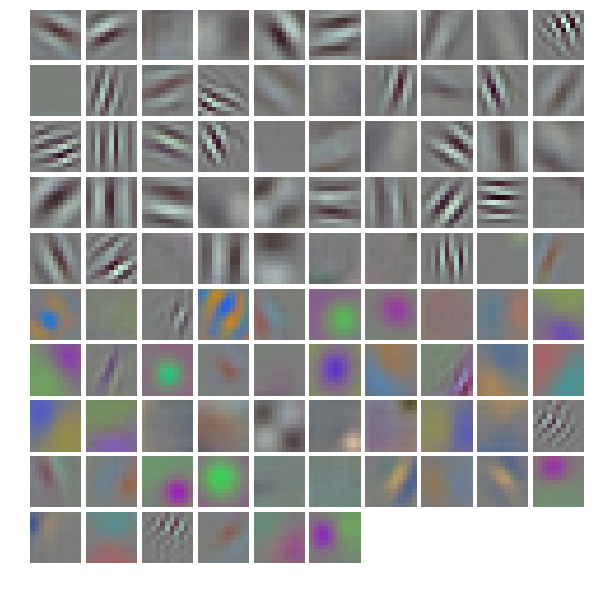

In [33]:
# the parameters are a list of [weights, biases]
filters = net.params['conv1'][0].data
vis_square(filters.transpose(0, 2, 3, 1))

(96, 55, 55)


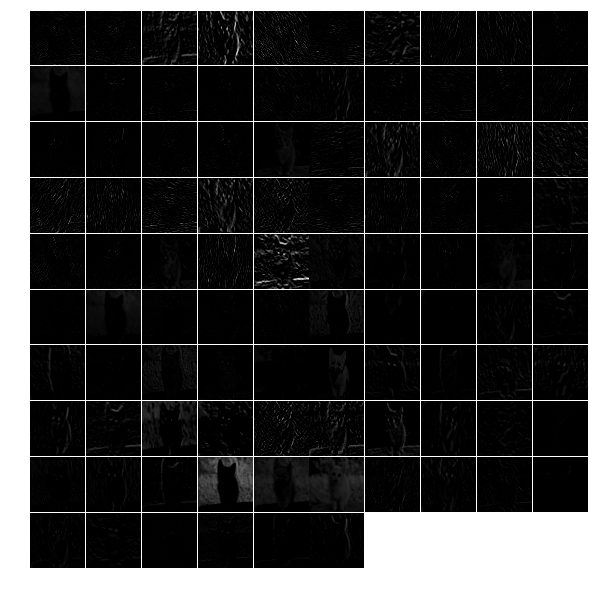

In [34]:
feat = net.blobs['conv1'].data[0]
vis_square(feat)
print feat.shape

(256, 6, 6)


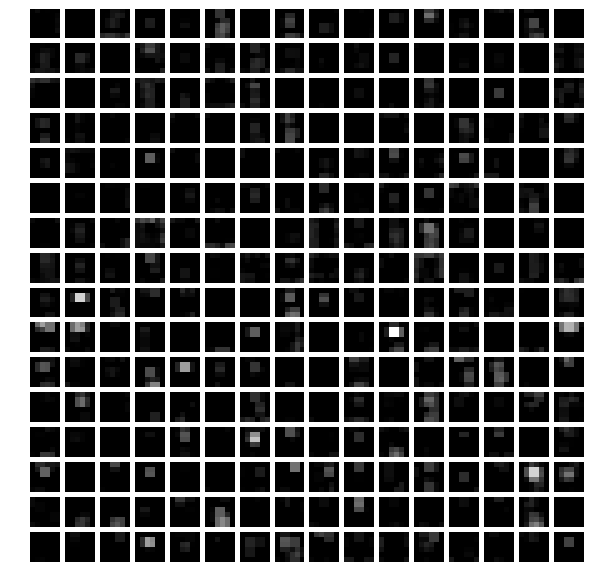

In [35]:
feat = net.blobs['pool5'].data[0]
vis_square(feat)
print feat.shape

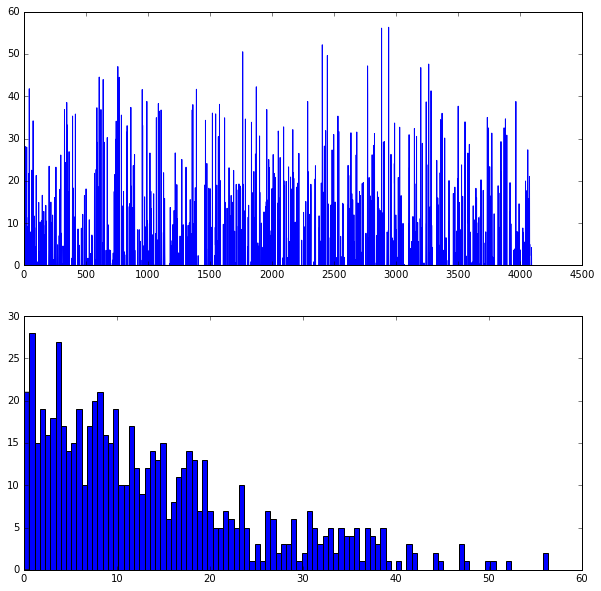

In [36]:
feat = net.blobs['fc6'].data[0]
plt.subplot(2, 1, 1)
plt.plot(feat.flat)
plt.subplot(2, 1, 2)
_ = plt.hist(feat.flat[feat.flat > 0], bins=100)

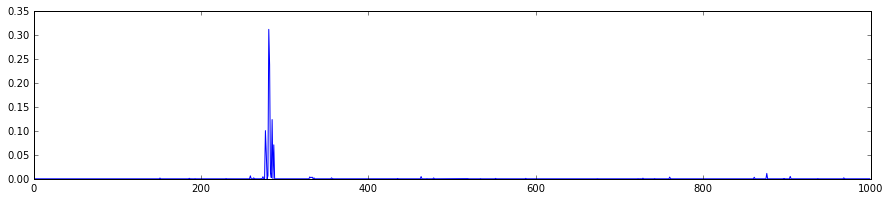

In [37]:
feat = net.blobs['prob'].data[0]
plt.figure(figsize=(15, 3))
plt.plot(feat.flat)

## 6 Using caffe.Classifier

If we just want to use the distributed models, we may use caffe.Classifier class.

Let's assume that mean (mu) and labels are already loaded.

In [38]:
my_net = caffe.Classifier('./models/bvlc_reference_caffenet/deploy.prototxt', 
                           './models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel',
                       mean=mu,
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(227, 227))

In [39]:
output_prob = my_net.predict([caffe.io.load_image('./examples/images/cat.jpg')]) 

print 'predicted label is:', labels[output_prob[0].argmax()]

predicted label is: n02123045 tabby, tabby cat
